In [1]:
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
plt.set_cmap(plt.cm.Paired) # 色設定

In [2]:
# 境界線を引く関数の定義

def plotBoundary(X, clf, mesh=True, boundary=True, type='predict'):

    # plot range
    x_min = min(X[:,0])
    x_max = max(X[:,0])
    y_min = min(X[:,1])
    y_max = max(X[:,1])

    # visualizing decision function
    XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j] # make a grid
    
    if type == 'predict':
        Z = clf.predict(np.c_[XX.ravel(), YY.ravel()])
    elif type == 'probability':
        Z = np.exp(clf.predict_log_proba(np.c_[XX.ravel(), YY.ravel()]))[:, 1]
    else:
        Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()])
    
    Z = Z.reshape(XX.shape) # just reshape

    if mesh:
        if type == 'predict':
            plt.pcolormesh(XX, YY, Z, zorder=-10) # paint in 2 colors, if Z > 0 or not
        else:
            plt.pcolormesh(XX, YY, Z, zorder=-10, cmap=plt.cm.bwr)
            plt.colorbar()

    if boundary:
        level = [0]
        if type == "probability":
            level = [0.5]
        plt.contour(XX, YY, Z, 
                    colors='k', linestyles='-', levels=level)

    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)

In [3]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(random_state=8)

clf.alpha = 1
clf.max_iter = 2000
clf.hidden_layer_sizes=(10,)

clf

MLPClassifier(activation='relu', alpha=1, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(10,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=2000, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=8, shuffle=True,
       solver='adam', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

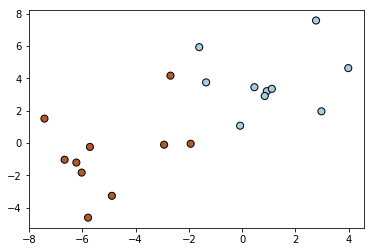

In [4]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=20, # 20個生成
                  n_features=2, # 2次元
                  centers=2,    # クラスタ中心2個
                  cluster_std = 2, # クラスタの大きさ（標準偏差）
                  random_state=3   # 乱数種（再現用）
                 )

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, edgecolors='k'); # 2次元散布図でプロット

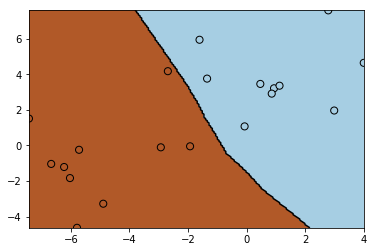

In [5]:
clf.fit(X,y)

plt.scatter(X[:, 0], X[:, 1], marker='o', s=50, c=y, edgecolors='k') # 2次元散布図でプロット

plotBoundary(X, clf)

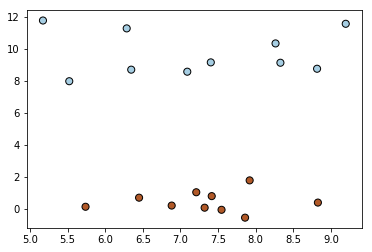

In [6]:
X, y = make_blobs(n_samples=20, # 20個生成
                  n_features=2, # 2次元
                  centers=2,    # クラスタ中心2個
                  cluster_std =1, # クラスタの大きさ（標準偏差）
                  random_state=8   # 乱数種（再現用）
                 )
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, edgecolors='k'); # 2次元散布図でプロット

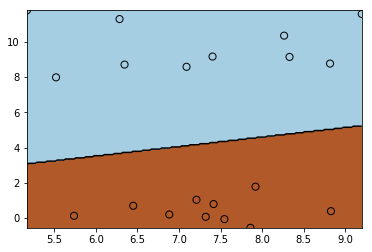

In [7]:
clf.fit(X,y)

plotBoundary(X, clf)
    
plt.scatter(X[:, 0], X[:, 1], marker='o', s=50, c=y, edgecolors='k')

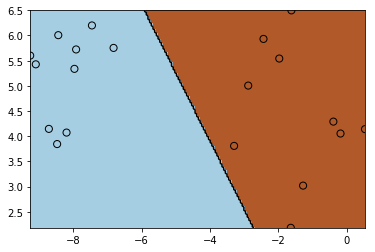

In [8]:
X, y = make_blobs(n_samples=20, # 20個生成
                  n_features=2, # 2次元
                  centers=2,    # クラスタ中心2個
                  cluster_std =1, # クラスタの大きさ（標準偏差）
                  random_state=7   # 乱数種（再現用）
                 )
clf.fit(X,y)

plotBoundary(X, clf)
    
plt.scatter(X[:, 0], X[:, 1], marker='o', s=50, c=y, edgecolors='k')

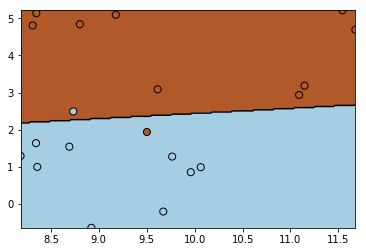

In [9]:
X, y = make_blobs(n_samples=20, # 20個生成
                  n_features=2, # 2次元
                  centers=2,    # クラスタ中心2個
                  cluster_std =1, # クラスタの大きさ（標準偏差）
                  random_state=4   # 乱数種（再現用）
                 )
clf.fit(X,y)

plotBoundary(X, clf)
    
plt.scatter(X[:, 0], X[:, 1], marker='o', s=50, c=y, edgecolors='k')

In [10]:
# modified from https://gist.github.com/craffel/2d727968c3aaebd10359

def draw_neural_net(layer_sizes, left=.1, right=.9, bottom=.1, top=.9, size=5):
    '''
    Draw a neural network cartoon using matplotilb.
    
    :usage:
        >>> fig = plt.figure(figsize=(12, 12))
        >>> draw_neural_net(fig.gca(), .1, .9, .1, .9, [4, 7, 2])
    
    :parameters:
        - ax : matplotlib.axes.AxesSubplot
            The axes on which to plot the cartoon (get e.g. by plt.gca())
        - left : float
            The center of the leftmost node(s) will be placed here
        - right : float
            The center of the rightmost node(s) will be placed here
        - bottom : float
            The center of the bottommost node(s) will be placed here
        - top : float
            The center of the topmost node(s) will be placed here
        - layer_sizes : list of int
            List of layer sizes, including input and output dimensionality
    '''
    fig = plt.figure(figsize=(size, size))
    ax = fig.gca()
    ax.axis('off')

    n_layers = len(layer_sizes)
    v_spacing = (top - bottom)/float(max(layer_sizes))
    h_spacing = (right - left)/float(len(layer_sizes) - 1)
    # Nodes
    for n, layer_size in enumerate(layer_sizes):
        layer_top = v_spacing*(layer_size - 1)/2. + (top + bottom)/2.
        for m in range(layer_size):
            circle = plt.Circle((n*h_spacing + left, layer_top - m*v_spacing), v_spacing/4.,
                                color='w', ec='k', zorder=4)
            ax.add_artist(circle)
    # Edges
    for n, (layer_size_a, layer_size_b) in enumerate(zip(layer_sizes[:-1], layer_sizes[1:])):
        layer_top_a = v_spacing*(layer_size_a - 1)/2. + (top + bottom)/2.
        layer_top_b = v_spacing*(layer_size_b - 1)/2. + (top + bottom)/2.
        for m in range(layer_size_a):
            for o in range(layer_size_b):
                line = plt.Line2D([n*h_spacing + left, (n + 1)*h_spacing + left],
                                  [layer_top_a - m*v_spacing, layer_top_b - o*v_spacing], c='k')
                ax.add_artist(line)



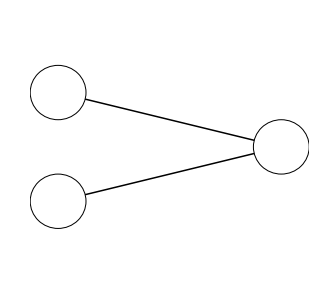

In [11]:
draw_neural_net([2, 1])

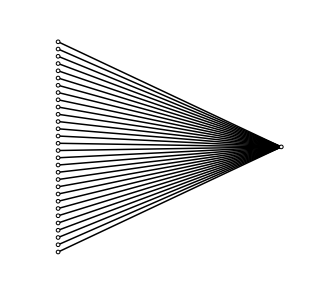

In [12]:
draw_neural_net([30, 1])

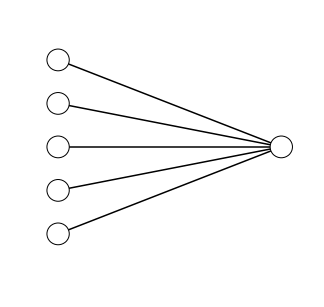

In [13]:
draw_neural_net([5, 1])

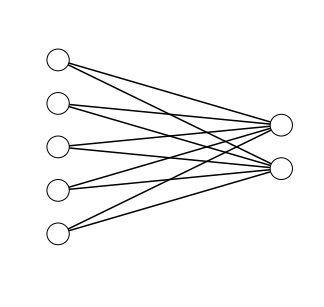

In [14]:
draw_neural_net([5, 2])

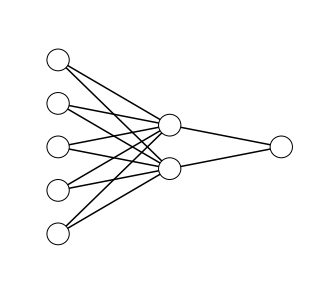

In [15]:
draw_neural_net([5, 2, 1])

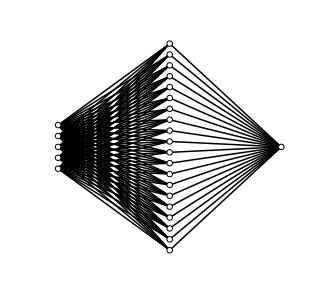

In [16]:
draw_neural_net([5, 20, 1])

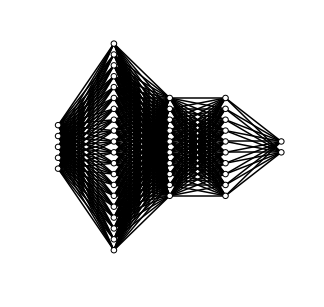

In [17]:
draw_neural_net([5, 20, 10, 10, 2])

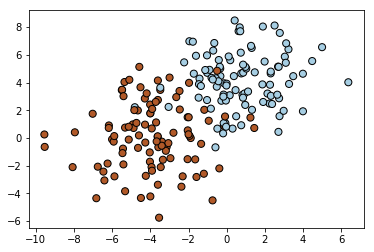

In [18]:
X, y = make_blobs(n_samples=200, # 20個生成
                  n_features=2, # 2次元
                  centers=2,    # クラスタ中心2個
                  cluster_std =2, # クラスタの大きさ（標準偏差）
                  random_state=3   # 乱数種（再現用）
                 )
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, edgecolors='k'); # 2次元散布図でプロット

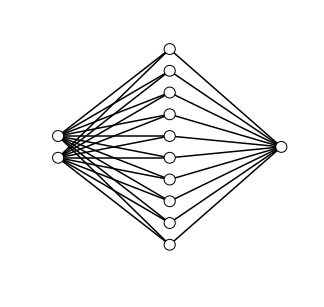

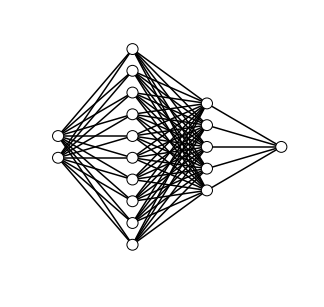

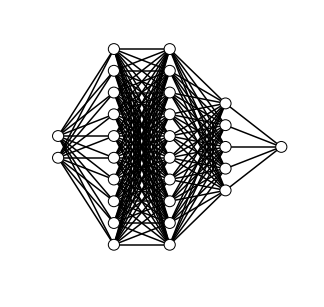

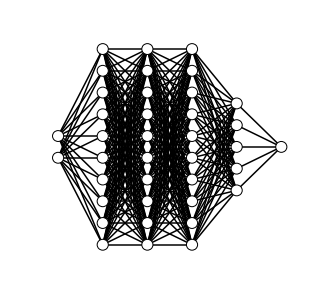

In [19]:
draw_neural_net([2, 10, 1], size=5)
draw_neural_net([2, 10, 5, 1], size=5)
draw_neural_net([2, 10, 10, 5, 1], size=5)
draw_neural_net([2, 10, 10, 10, 5, 1], size=5)

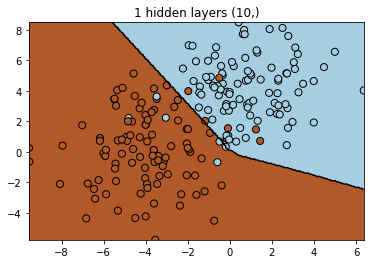

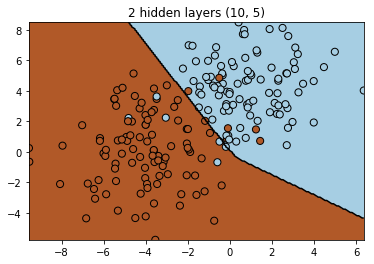

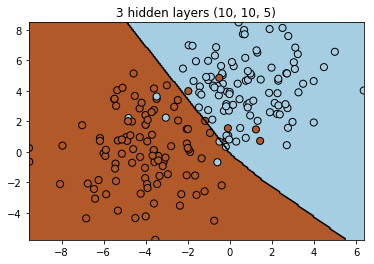

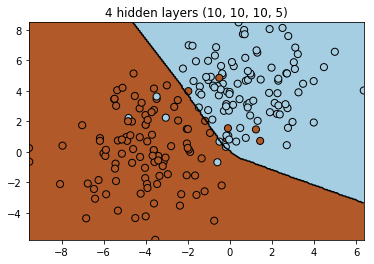

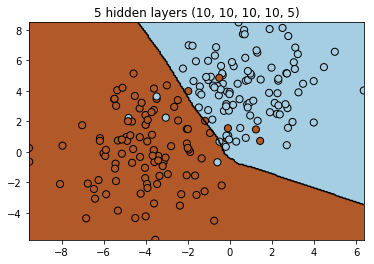

In [20]:
clf.random_state = 10

for layers in [(10,),
               (10, 5),
               (10, 10, 5),
               (10, 10, 10, 5),
               (10, 10, 10, 10, 5)]:

    clf.hidden_layer_sizes = layers
    
    clf.fit(X,y)
    plt.scatter(X[:, 0], X[:, 1], marker='o', s=50, c=y, edgecolors='k')
    plotBoundary(X, clf)
    plt.title("{0} hidden layers {1}".format(len(layers), layers))
    plt.show()

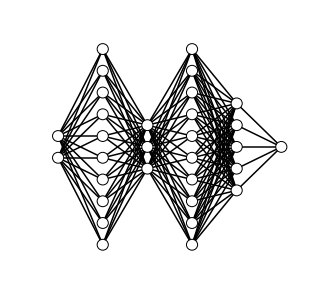

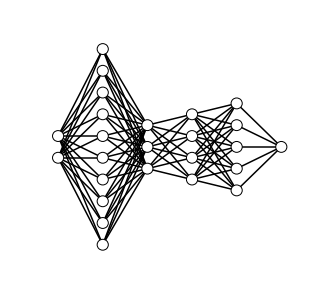

In [21]:
draw_neural_net([2, 10, 3, 10, 5, 1], size=5)
draw_neural_net([2, 10, 3, 4, 5, 1], size=5)

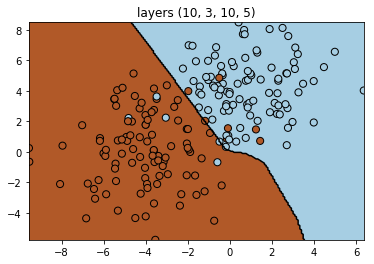

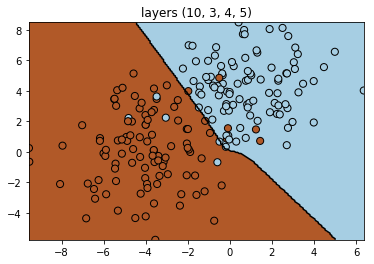

In [22]:
clf.random_state = 10

for layers in [(10,3,10,5),
               (10,3,4,5)]:
    clf.hidden_layer_sizes = layers
    
    clf.fit(X,y)
    plt.scatter(X[:, 0], X[:, 1], marker='o', s=50, c=y, edgecolors='k')
    plotBoundary(X, clf)
    plt.title("layers {0}".format(layers))
    plt.show()

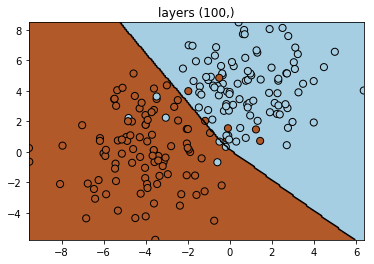

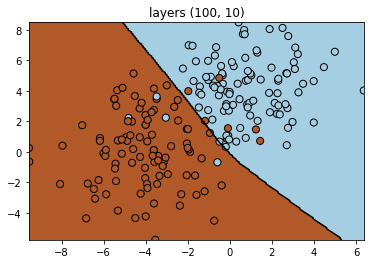

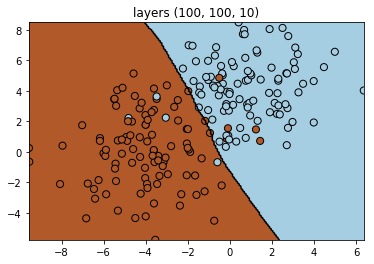

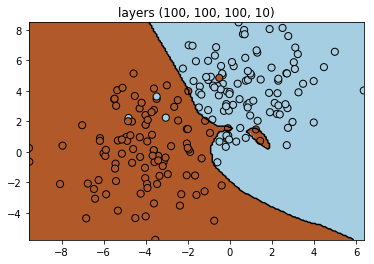

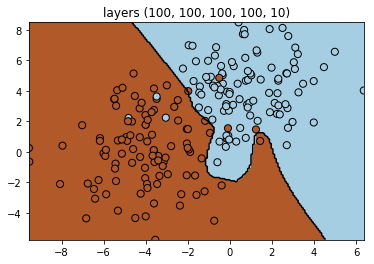

In [23]:
clf.random_state = 10

for layers in [(100,),
               (100,10),
               (100,100,10),
               (100,100,100,10),
               (100,100,100,100,10)]:
    clf.hidden_layer_sizes=layers
    clf.fit(X,y)
    plt.scatter(X[:, 0], X[:, 1], marker='o', s=50, c=y, edgecolors='k')
    plotBoundary(X, clf)
    plt.title("layers {0}".format(layers))
    plt.show()

In [24]:
clf

MLPClassifier(activation='relu', alpha=1, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100, 100, 100, 100, 10),
       learning_rate='constant', learning_rate_init=0.001, max_iter=2000,
       momentum=0.9, nesterovs_momentum=True, power_t=0.5, random_state=10,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [25]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
X = data.data
y = data.target

In [26]:
from sklearn.model_selection import ShuffleSplit
ss = ShuffleSplit(n_splits=1, 
                  train_size=0.8, 
                  test_size=0.2, 
                  random_state=0)

train_index, test_index = next(ss.split(X, y))

X_train, X_test = X[train_index], X[test_index]
y_train, y_test = y[train_index], y[test_index]

In [27]:
clf = MLPClassifier()

In [28]:
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.93859649122807021

In [29]:
clf

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [30]:

for layers in [(100,),
               (100,10),
               (100,100,10),
               (100,100,100,10),
               (100,100,100,100,10),
               (100,100,100,100,100,10)]:
    
    clf.hidden_layer_sizes = layers
    clf.fit(X_train, y_train)
    print("{0} hidden layers".format(len(layers)), clf.score(X_test, y_test))

1 hidden layers 0.464912280702
2 hidden layers 0.710526315789
3 hidden layers 0.90350877193
4 hidden layers 0.947368421053
5 hidden layers 0.868421052632
6 hidden layers 0.90350877193


In [31]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scale = scaler.transform(X_train)
X_test_scale  = scaler.transform(X_test)

In [32]:
clf = MLPClassifier()

In [33]:
clf.fit(X_train_scale, y_train)
clf.score(X_test_scale, y_test)

0.96491228070175439

In [34]:
clf.alpha = 1
clf.fit(X_train_scale, y_train)
clf.score(X_test_scale, y_test)

0.95614035087719296

In [35]:
for layers in [(100,),
               (100,10),
               (100,100,10),
               (100,100,100,10),
               (100,100,100,100,10),
               (100,100,100,100,100,10)]:
    clf.hidden_layer_sizes = layers
    clf.fit(X_train_scale, y_train)
    print("{0} hidden layers".format(len(layers)), clf.score(X_test_scale, y_test))

1 hidden layers 0.964912280702
2 hidden layers 0.964912280702
3 hidden layers 0.964912280702
4 hidden layers 0.964912280702
5 hidden layers 0.964912280702
6 hidden layers 0.973684210526


1 hidden layer with 1 nodes 0.885964912281


/Users/tamaki/anaconda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


1 hidden layer with 2 nodes 0.850877192982
1 hidden layer with 3 nodes 0.587719298246
1 hidden layer with 4 nodes 0.929824561404
1 hidden layer with 5 nodes 0.938596491228
1 hidden layer with 6 nodes 0.877192982456
1 hidden layer with 7 nodes 0.912280701754
1 hidden layer with 8 nodes 0.929824561404
1 hidden layer with 9 nodes 0.929824561404
1 hidden layer with 10 nodes 0.929824561404
1 hidden layer with 11 nodes 0.929824561404
1 hidden layer with 12 nodes 0.921052631579
1 hidden layer with 13 nodes 0.912280701754
1 hidden layer with 14 nodes 0.921052631579
1 hidden layer with 15 nodes 0.929824561404
1 hidden layer with 16 nodes 0.929824561404
1 hidden layer with 17 nodes 0.929824561404
1 hidden layer with 18 nodes 0.929824561404
1 hidden layer with 19 nodes 0.938596491228


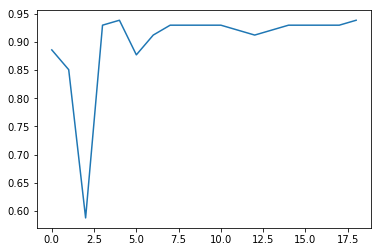

In [36]:
scores = []
for nodes in range(1, 20):

    clf.hidden_layer_sizes = (nodes,)
    
    clf.fit(X_train_scale, y_train)
    score = clf.score(X_test_scale, y_test)
    print("1 hidden layer with {0} nodes".format(nodes), score)
    scores.append( score )

socres = np.array(scores)
plt.plot(scores)